<h1> Exploratory Data Analysis </h1>

In [49]:
import os
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sb
import matplotlib 
from matplotlib import pyplot as plt
# matplotlib.rcParams['agg.path.chunksize'] = 10000
import datetime as dt

In [50]:
loans = pd.read_csv(os.getcwd()+'/files/loan.csv')
loans.head(5)

C:\Users\prati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


<h1> Dataset shape </h1>

In [51]:
# rows and columns
print("Dataset Shape")
print('-'* 127)
print(loans.shape)
print()

Dataset Shape
-------------------------------------------------------------------------------------------------------------------------------
(2260668, 145)



<h1>Column Names</h1>

In [52]:
columns = list()
for i in loans.columns:
    columns.append(i)

print(columns)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_i

<h1> Loan Types </h1>

In [53]:
print(loans['loan_status'].unique())

['Current' 'Fully Paid' 'Late (31-120 days)' 'In Grace Period'
 'Charged Off' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


<h1> Total count of different types of loan </h1>

In [54]:
labels = []
values = []

for key, value in Counter(loans['loan_status']).items():
    print(key + ' : ' + str(value) + ' rows')
    if key in ('Fully Paid','Default','Charged Off'):
        labels.append(key)
        values.append(value)

Current : 919695 rows
Fully Paid : 1041952 rows
Late (31-120 days) : 21897 rows
In Grace Period : 8952 rows
Charged Off : 261655 rows
Late (16-30 days) : 3737 rows
Default : 31 rows
Does not meet the credit policy. Status:Fully Paid : 1988 rows
Does not meet the credit policy. Status:Charged Off : 761 rows


<h1> Total loans as per terms </h1>

In [55]:
for key,value in Counter(loans['term']).items():
    print(key + ' : ' + str(value) + ' rows')

 36 months : 1609754 rows
 60 months : 650914 rows


<h1> Total loans as per grades </h1>

In [56]:
for key, value in sorted(Counter(loans['grade']).items()):
    print(key + ' : ' + str(value) + ' rows')

A : 433027 rows
B : 663557 rows
C : 650053 rows
D : 324424 rows
E : 135639 rows
F : 41800 rows
G : 12168 rows


<h1> Loans issued max and min dates </h1>

In [57]:
print('Max date in dataset:', max(loans['issue_d']))
print('Min date in dataset:', min(loans['issue_d']))

Max date in dataset: Sep-2018
Min date in dataset: Apr-2008


<h1> Approx Values </h1>

In [58]:
#get the approx values
loans[['loan_amnt','funded_amnt','annual_inc','total_pymnt', 'total_pymnt_inv','tot_coll_amt', 'tot_cur_bal']].describe()

,loan_amnt,funded_amnt,annual_inc,total_pymnt,total_pymnt_inv,tot_coll_amt,tot_cur_bal
count,2.260668e+06,2.260668e+06,2.260664e+06,2.260668e+06,2.260668e+06,2.190392e+06,2.190392e+06
mean,1.504693e+04,1.504166e+04,7.799243e+04,1.182403e+04,1.180594e+04,2.327317e+02,1.424922e+05
std,9.190245e+03,9.188413e+03,1.126962e+05,9.889599e+03,9.884835e+03,8.518462e+03,1.606926e+05
min,5.000000e+02,5.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,4.600000e+04,4.272580e+03,4.257730e+03,0.000000e+00,2.909200e+04
50%,1.290000e+04,1.287500e+04,6.500000e+04,9.060870e+03,9.043080e+03,0.000000e+00,7.924000e+04
75%,2.000000e+04,2.000000e+04,9.300000e+04,1.670797e+04,1.668257e+04,0.000000e+00,2.132040e+05
max,4.000000e+04,4.000000e+04,1.100000e+08,6.329688e+04,6.329688e+04,9.152545e+06,9.971659e+06


<h1> Null Values </h1>

In [59]:
#identify the null values
loans[loans.isnull().any(axis = 1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


<h1> Checking for any outliers </h1>

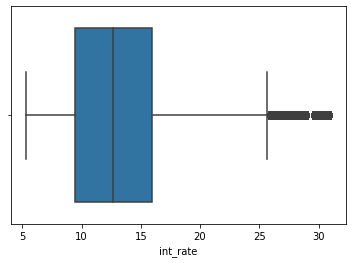

In [60]:
sb.boxplot(x = loans['int_rate']) 

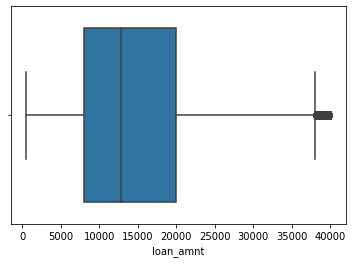

In [61]:
sb.boxplot(x = loans['loan_amnt']) 

<h1> Fully Paid vs Default vs Charged-Off </h1>

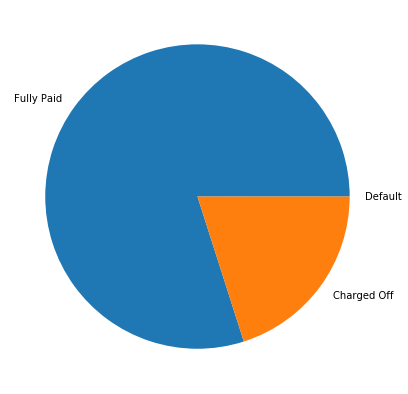

In [62]:
values
fig = plt.figure(figsize=(10, 7))
plt.pie(values, labels = labels)
plt.show()